In [1]:
from helpers import *
from solvers import *
import matplotlib.pyplot as plt
from functools import partial

index_number = 193328
N = 900 + index_number % 100
e = index_number % 10**3 // 10**2
f = index_number % 10**4 // 10**3

a1, a2, a3 = 5+e, -1, -1
A_a = generate_A_matrix(N, a1, a2, a3)
b = generate_b_vector(N, f)
print(f"index_number = {index_number}, a1 = {a1}, a2 = {a2}, a3 = {a3}")
display_matrices([(A_a, 'A_a'), (b, 'b')])

index_number = 193328, a1 = 8, a2 = -1, a3 = -1


<IPython.core.display.Math object>

In [2]:
eps = 1e-9
error_threshold = 1e9

result_jacobi_a = result_cache(
    partial(solve_jacobi, A_a, b, precision=eps, error_threshold=error_threshold), SolverResult.toJSON, SolverResult.fromJSON, "jacobi-a.json"
)
print(f"Jacobi method: {result_jacobi_a.iterations} iterations, error: {result_jacobi_a.error}, time: {result_jacobi_a.time} seconds, finished: {result_jacobi_a.finished}")

result_gauss_seidel_a = result_cache(
    partial(solve_gauss_seidel, A_a, b, precision=eps, error_threshold=error_threshold), SolverResult.toJSON, SolverResult.fromJSON, "gauss-seidel-a.json"
)
print(f"Gauss-Seidel method: {result_gauss_seidel_a.iterations} iterations, error: {result_gauss_seidel_a.error}, time: {result_gauss_seidel_a.time} seconds, finished: {result_gauss_seidel_a.finished}")

result_lu_decomposition_a = result_cache(
    partial(solve_lu_decomposition, A_a, b), SolverResult.toJSON, SolverResult.fromJSON, "lu-a.json"
)
print(f"LU decomposition method: error: {result_lu_decomposition_a.error}, time: {result_lu_decomposition_a.time} seconds")

display_matrices([(result_jacobi_a.x, 'jacobi_a'), (result_gauss_seidel_a.x, 'gaussseidel_a'), (result_lu_decomposition_a.x, 'lu_a')])

Jacobi method: 24 iterations, error: 6.45982020781103e-10, time: 3.9153319 seconds, finished: True
Gauss-Seidel method: 17 iterations, error: 4.647756224628755e-10, time: 2.6040142 seconds, finished: True
LU decomposition method: error: 2.1487378237870888e-15, time: 33.2784297 seconds


<IPython.core.display.Math object>

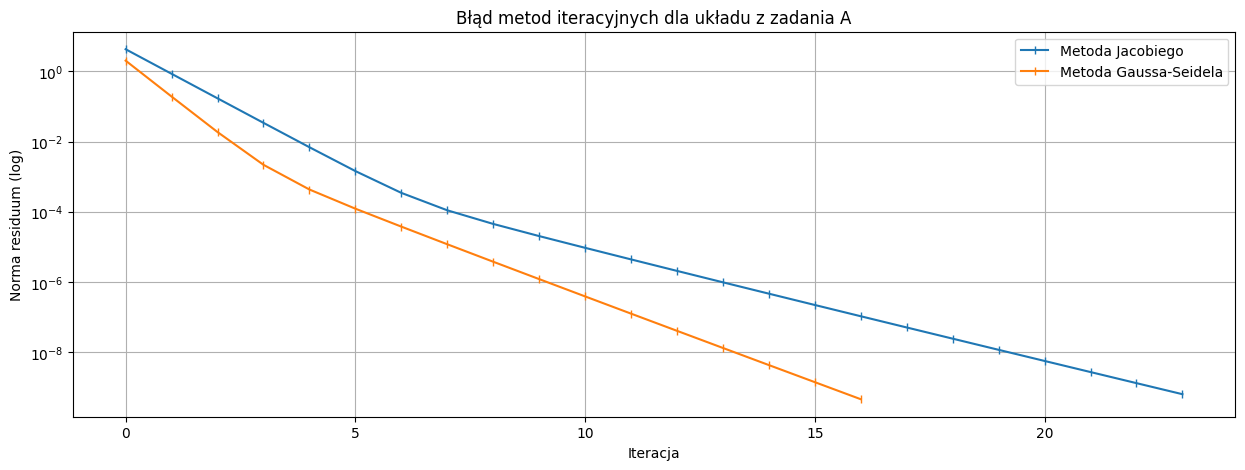

In [3]:
plots_dir = '../plots'
if not os.path.exists(plots_dir):
    os.makedirs(plots_dir)

plt.figure(figsize=(15, 5))
plt.grid()
plt.plot(result_jacobi_a.error_history, '-|', label='Metoda Jacobiego')
plt.plot(result_gauss_seidel_a.error_history, '-|', label='Metoda Gaussa-Seidela')
plt.title('Błąd metod iteracyjnych dla układu z zadania A')
plt.xlabel('Iteracja')
plt.ylabel('Norma residuum (log)')
plt.yscale('log')
plt.legend()
plt.savefig(f'{plots_dir}/iterative-a.png', bbox_inches='tight')
plt.show()

In [4]:
c1, c2, c3 = 3, -1, -1
A_c = generate_A_matrix(N, c1, c2, c3)
print(f"index_number = {index_number}, c1 = {c1}, c2 = {c2}, c3 = {c3}")
display_matrices([(A_c, 'A_c'), (b, 'b')])

index_number = 193328, c1 = 3, c2 = -1, c3 = -1


<IPython.core.display.Math object>

In [5]:
result_jacobi_c = result_cache(
    partial(solve_jacobi, A_c, b, precision=eps, error_threshold=error_threshold), SolverResult.toJSON, SolverResult.fromJSON, "jacobi-c.json"
)
print(f"Jacobi method: {result_jacobi_c.iterations} iterations, error: {result_jacobi_c.error}, time: {result_jacobi_c.time} seconds, finished: {result_jacobi_c.finished}")

result_gauss_seidel_c = result_cache(
    partial(solve_gauss_seidel, A_c, b, precision=eps, error_threshold=error_threshold), SolverResult.toJSON, SolverResult.fromJSON, "gauss-seidel-c.json"
)
print(f"Gauss-Seidel method: {result_gauss_seidel_c.iterations} iterations, error: {result_gauss_seidel_c.error}, time: {result_gauss_seidel_c.time} seconds, finished: {result_gauss_seidel_c.finished}")

result_lu_decomposition_c = result_cache(
    partial(solve_lu_decomposition, A_c, b), SolverResult.toJSON, SolverResult.fromJSON, "lu-c.json"
)
print(f"LU decomposition method: error: {result_lu_decomposition_c.error}, time: {result_lu_decomposition_c.time} seconds")

display_matrices([(result_jacobi_c.x, 'jacobi_c'), (result_gauss_seidel_c.x, 'gaussseidel_c'), (result_lu_decomposition_c.x, 'lu_c')])

Jacobi method: 92 iterations, error: 1234119999.2230158, time: 15.3062337 seconds, finished: False
Gauss-Seidel method: 37 iterations, error: 1183623809.2900004, time: 5.6345844 seconds, finished: False
LU decomposition method: error: 1.211472788285935e-12, time: 32.1004932 seconds


<IPython.core.display.Math object>

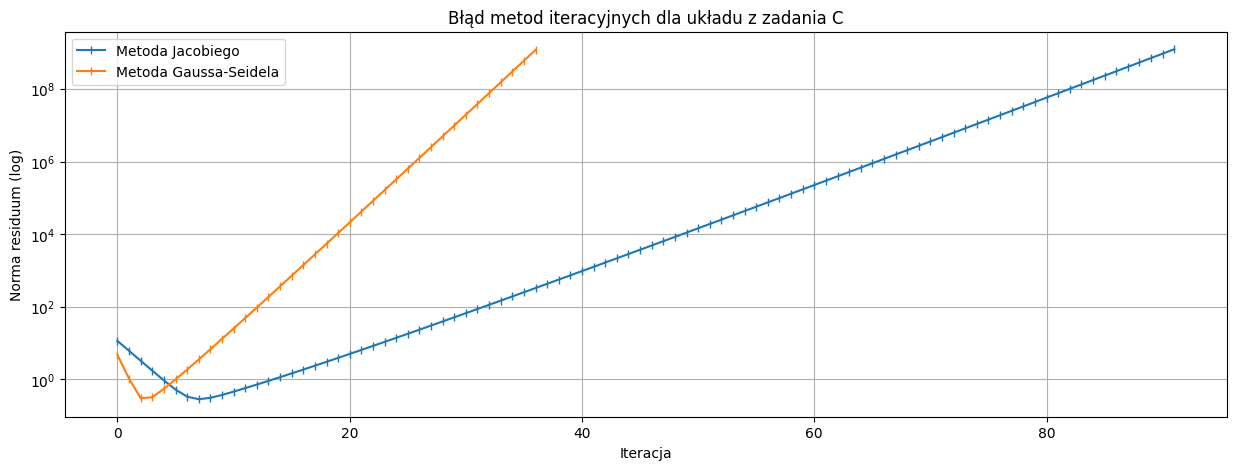

In [6]:
plt.figure(figsize=(15, 5))
plt.grid()
plt.plot(result_jacobi_c.error_history, '-|', label='Metoda Jacobiego')
plt.plot(result_gauss_seidel_c.error_history, '-|', label='Metoda Gaussa-Seidela')
plt.title('Błąd metod iteracyjnych dla układu z zadania C')
plt.xlabel('Iteracja')
plt.ylabel('Norma residuum (log)')
plt.yscale('log')
plt.legend()
plt.savefig(f'{plots_dir}/iterative-c.png', bbox_inches='tight')
plt.show()


N = 100
Jacobi method: 24 iterations, error: 8.192649787036879e-10, time: 0.0466804 seconds, finished: True
Gauss-Seidel method: 17 iterations, error: 6.164913801274772e-10, time: 0.0299448 seconds, finished: True
LU decomposition method: error: 7.244833297987496e-16, time: 0.0329174 seconds

N = 500
Jacobi method: 23 iterations, error: 7.239307116478436e-10, time: 1.116892 seconds, finished: True
Gauss-Seidel method: 16 iterations, error: 6.117726330738013e-10, time: 0.7027835 seconds, finished: True
LU decomposition method: error: 1.5104781302912234e-15, time: 4.2767321 seconds

N = 1000
Jacobi method: 24 iterations, error: 7.905960242874455e-10, time: 4.6454314 seconds, finished: True
Gauss-Seidel method: 17 iterations, error: 5.99591476287176e-10, time: 3.0135801 seconds, finished: True
LU decomposition method: error: 2.1060544138048844e-15, time: 42.6112665 seconds

N = 1500
Jacobi method: 24 iterations, error: 7.118166973893165e-10, time: 10.3469868 seconds, finished: True
Gauss

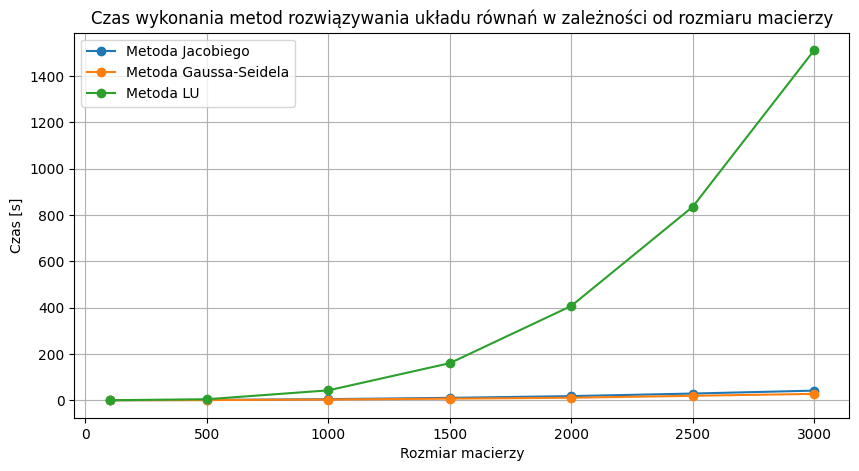

In [7]:
test_sizes = [100, 500, 1000, 1500, 2000, 2500, 3000]

results = []
for N in test_sizes:
    A = generate_A_matrix(N, 5+e, -1, -1)
    b = generate_b_vector(N, 1)
    dir = f'../results/N-{N}'

    print(f"\nN = {N}")
    result_jacobi = result_cache(
        partial(solve_jacobi, A, b, precision=eps, error_threshold=error_threshold), SolverResult.toJSON, SolverResult.fromJSON, f"jacobi.json", dir
    )
    print(f"Jacobi method: {result_jacobi.iterations} iterations, error: {result_jacobi.error}, time: {result_jacobi.time} seconds, finished: {result_jacobi.finished}")

    result_gauss_seidel = result_cache(
        partial(solve_gauss_seidel, A, b, precision=eps, error_threshold=error_threshold), SolverResult.toJSON, SolverResult.fromJSON, f"gauss-seidel.json", dir
    )
    print(f"Gauss-Seidel method: {result_gauss_seidel.iterations} iterations, error: {result_gauss_seidel.error}, time: {result_gauss_seidel.time} seconds, finished: {result_gauss_seidel.finished}")
    
    result_lu_decomposition = result_cache(
        partial(solve_lu_decomposition, A, b), SolverResult.toJSON, SolverResult.fromJSON, f"lu.json", dir
    )
    print(f"LU decomposition method: error: {result_lu_decomposition.error}, time: {result_lu_decomposition.time} seconds")

    results.append((result_jacobi, result_gauss_seidel, result_lu_decomposition))

plt.figure(figsize=(10, 5))
plt.grid()
plt.plot(test_sizes, [result[0].time for result in results], '-o', label='Metoda Jacobiego')
plt.plot(test_sizes, [result[1].time for result in results], '-o', label='Metoda Gaussa-Seidela')
plt.plot(test_sizes, [result[2].time for result in results], '-o', label='Metoda LU')
plt.title('Czas wykonania metod rozwiązywania układu równań w zależności od rozmiaru macierzy')
plt.xlabel('Rozmiar macierzy')
plt.ylabel('Czas [s]')
plt.legend()
plt.savefig(f'{plots_dir}/time.png', bbox_inches='tight')
plt.show()